In [23]:
import ccxt
import pandas as pd
from IPython.display import display, HTML

# Function to fetch ETH/USDT historical data from Binance
def fetch_data(symbol, timeframe='1M', since='2000-01-01T00:00:00Z'):
    exchange = ccxt.binance()
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=exchange.parse8601(since))
    
    # Convert to DataFrame
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    
    # Extract year and month for pivot table analysis
    df['year'] = df.index.year
    df['month'] = df.index.month
    
    return df

# Function to calculate max drawdown (from open to low)
def calculate_max_drawdown(df):
    df['max_drawdown'] = (df['low'] - df['open']) / df['open'] * 100
    return df

# Function to calculate open-to-high percentage change
def calculate_high_to_open_change(df):
    df['high_to_open_change'] = (df['high'] - df['open']) / df['open'] * 100
    return df

# Function to calculate monthly return (from open to close)
def calculate_monthly_return(df):
    df['monthly_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to create and style the pivot table
def create_pivot_table(df, value_column):
    pivot_table = df.pivot_table(values=value_column, index='year', columns='month', aggfunc='mean')
    
    # Calculate mean and median for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)
    
    # Add the average and median as the last row
    pivot_table.loc['Avg'] = avg_value
    pivot_table.loc['Median'] = median_value
    
    # Style the table
    styled_table = pivot_table.style \
        .format('{:.2f}%') \
        .set_table_styles([
            {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'black')]},
            {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},
            {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
            {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
            {'selector': 'th', 'props': [('padding', '8px')]},
            {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},
            {'selector': 'tbody tr', 'props': [('color', 'blue')]}
        ]) \
        .set_table_attributes('class="dataframe"')
    
    return styled_table

# Function to display the table with a title
def display_table(title, styled_table):
    display(HTML(f"<h3>{title}</h3>"))
    display(styled_table)

# Main function to fetch data, process it, and display the results
def main():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_data(symbol)
    
    # Calculate indicators
    eth_data = calculate_max_drawdown(eth_data)
    eth_data = calculate_high_to_open_change(eth_data)
    eth_data = calculate_monthly_return(eth_data)
    
    # Create and display the pivot tables
    styled_table_max_drawdown = create_pivot_table(eth_data, 'max_drawdown')
    display_table("ETH/USDT Monthly Max Drawdown", styled_table_max_drawdown)
    
    styled_table_high_to_open_change = create_pivot_table(eth_data, 'high_to_open_change')
    display_table("ETH/USDT Monthly Open to High % Change", styled_table_high_to_open_change)
    
    styled_table_monthly_return = create_pivot_table(eth_data, 'monthly_return')
    display_table("ETH/USDT Monthly Returns (Open to Close)", styled_table_monthly_return)

# Run the main function
main()


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,-52.11%,-50.32%,-10.79%,-9.89%,-12.39%
2018,-2.21%,-49.37%,-57.12%,-9.40%,-24.55%,-30.00%,-8.20%,-42.16%,-40.55%,-18.89%,-48.49%,-28.07%
2019,-23.23%,-4.94%,-9.40%,-1.30%,-2.66%,-15.43%,-34.50%,-25.09%,-12.53%,-15.17%,-27.85%,-23.23%
2020,-2.54%,-0.47%,-60.42%,-3.09%,-14.59%,-6.72%,-1.21%,-6.16%,-28.90%,-7.68%,-4.19%,-13.98%
2021,-3.01%,-3.24%,-0.62%,-1.79%,-37.65%,-37.16%,-25.03%,-3.51%,-22.66%,-1.05%,-8.73%,-24.33%
2022,-41.27%,-14.40%,-16.29%,-17.44%,-37.54%,-54.60%,-6.04%,-15.26%,-21.50%,-10.44%,-31.74%,-11.12%
2023,-0.46%,-7.78%,-14.75%,-3.23%,-6.96%,-13.22%,-5.57%,-16.49%,-6.97%,-8.97%,-2.07%,-0.34%
2024,-7.97%,-1.89%,-8.49%,-21.76%,-6.54%,-13.88%,-18.27%,-34.70%,-14.42%,-11.23%,-6.39%,-1.20%
Avg,-11.53%,-11.73%,-23.87%,-8.29%,-18.64%,-24.43%,-14.12%,-24.43%,-24.73%,-10.53%,-17.42%,-14.33%


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,30.74%,2.06%,16.02%,68.91%,102.06%
2018,96.45%,3.47%,3.10%,80.99%,25.23%,8.83%,13.49%,0.65%,7.30%,2.56%,13.14%,38.66%
2019,21.16%,55.91%,7.81%,31.44%,78.33%,36.92%,8.64%,9.49%,30.56%,9.32%,7.08%,0.70%
2020,44.78%,60.28%,15.94%,71.26%,19.86%,9.60%,54.90%,28.78%,12.69%,16.92%,61.22%,23.04%
2021,100.29%,55.61%,37.26%,45.79%,57.72%,6.87%,12.22%,37.33%,17.46%,48.65%,13.54%,3.21%
2022,6.11%,22.21%,19.21%,9.11%,8.77%,1.58%,66.64%,20.97%,15.11%,25.16%,6.82%,4.50%
2023,40.39%,9.94%,15.69%,17.57%,7.96%,4.00%,4.93%,1.27%,2.95%,11.65%,17.76%,19.19%
2024,19.08%,54.30%,22.57%,2.34%,31.95%,3.33%,3.63%,0.30%,8.58%,6.43%,48.45%,1.17%
Avg,46.89%,37.39%,17.37%,36.93%,32.83%,10.16%,23.49%,16.19%,12.09%,17.09%,29.62%,24.07%


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,27.78%,-21.24%,-0.08%,40.19%,71.47%
2018,53.45%,-24.20%,-53.85%,70.28%,-13.86%,-21.41%,-4.84%,-34.89%,-17.24%,-14.72%,-42.76%,15.60%
2019,-19.03%,27.12%,4.48%,14.44%,65.52%,9.26%,-25.43%,-21.45%,5.44%,0.71%,-16.92%,-14.71%
2020,39.35%,20.71%,-38.92%,55.27%,12.37%,-2.57%,53.52%,25.26%,-17.05%,7.40%,59.57%,19.42%
2021,78.23%,8.13%,35.29%,44.44%,-2.39%,-15.91%,11.22%,35.48%,-12.50%,42.88%,7.99%,-20.60%
2022,-26.91%,8.71%,12.35%,-16.91%,-28.78%,-44.85%,56.68%,-7.39%,-14.50%,18.36%,-17.69%,-7.60%
2023,32.54%,1.26%,13.47%,2.67%,0.19%,3.21%,-4.02%,-11.33%,1.53%,8.60%,13.08%,11.20%
2024,0.06%,46.29%,9.14%,-17.32%,24.83%,-8.62%,-5.97%,-22.26%,3.55%,-3.21%,47.05%,0.75%
Avg,22.53%,12.57%,-2.58%,21.84%,8.27%,-11.56%,11.60%,-1.10%,-9.00%,7.49%,11.31%,9.44%


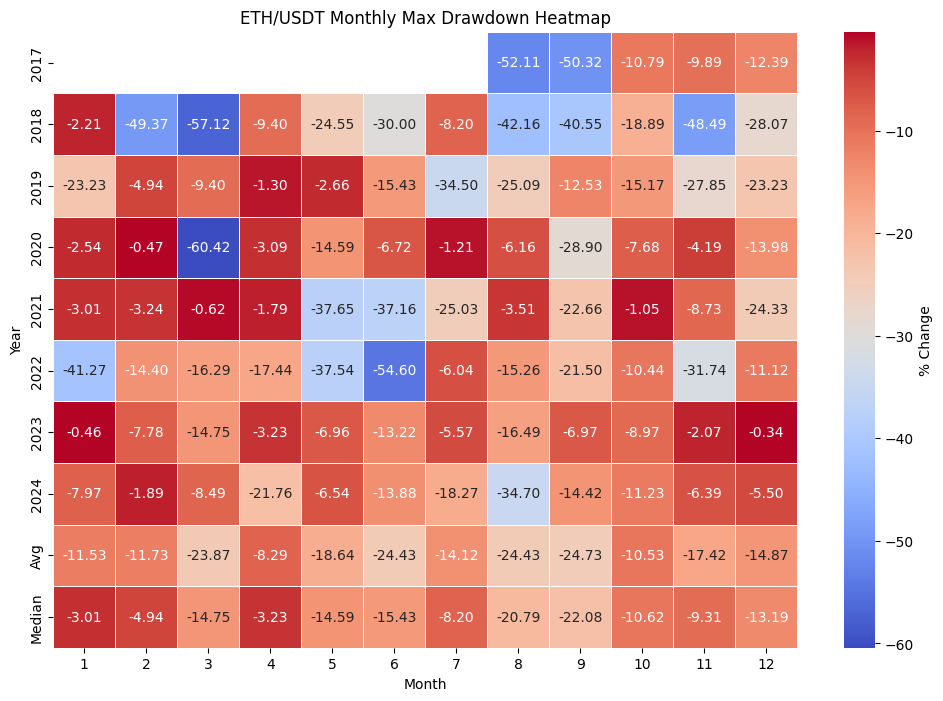

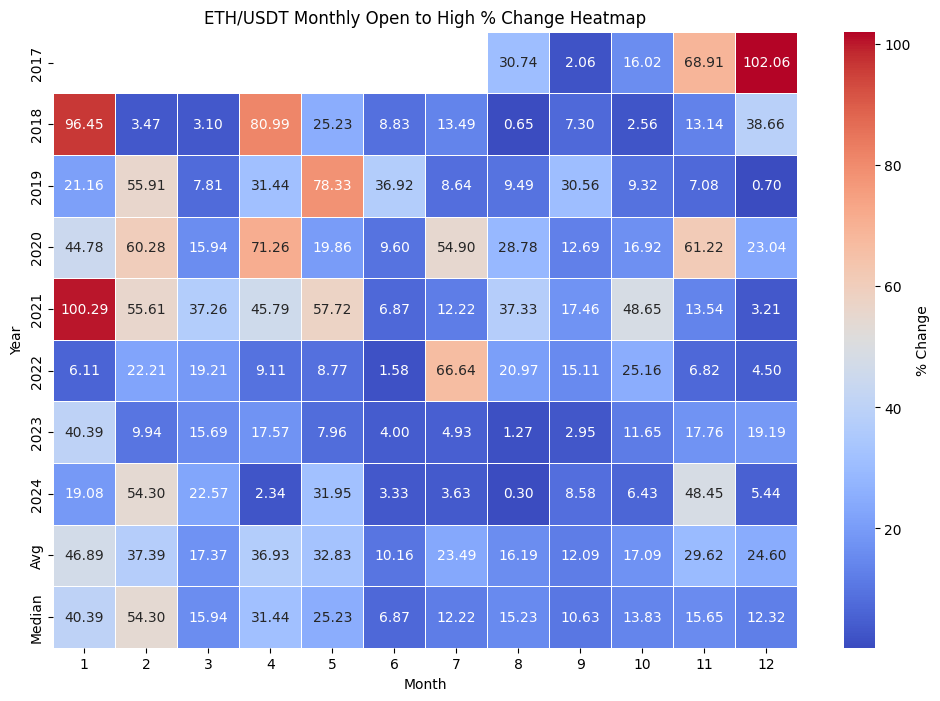

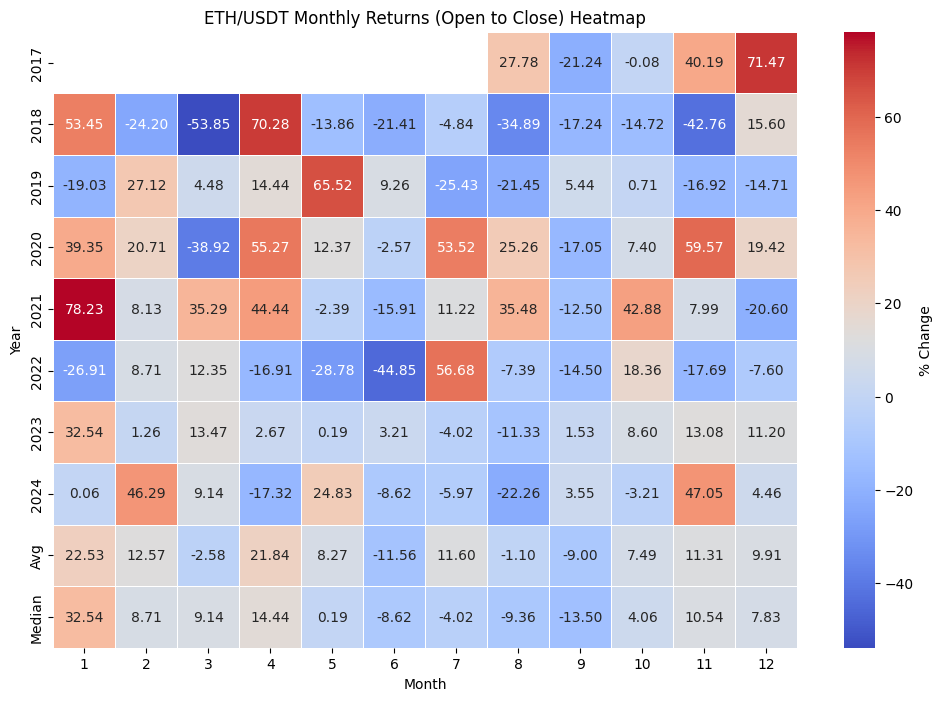

In [1]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fetch ETH/USDT historical data from Binance
def fetch_data(symbol, timeframe='1M', since='2000-01-01T00:00:00Z'):
    exchange = ccxt.binance()
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=exchange.parse8601(since))
    
    # Convert to DataFrame
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    
    # Extract year and month for pivot table analysis
    df['year'] = df.index.year
    df['month'] = df.index.month
    
    return df

# Function to calculate max drawdown (from open to low)
def calculate_max_drawdown(df):
    df['max_drawdown'] = (df['low'] - df['open']) / df['open'] * 100
    return df

# Function to calculate open-to-high percentage change
def calculate_high_to_open_change(df):
    df['high_to_open_change'] = (df['high'] - df['open']) / df['open'] * 100
    return df

# Function to calculate monthly return (from open to close)
def calculate_monthly_return(df):
    df['monthly_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to create and return the pivot table
def create_pivot_table(df, value_column):
    pivot_table = df.pivot_table(values=value_column, index='year', columns='month', aggfunc='mean')
    
    # Calculate mean and median for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)
    
    # Add the average and median as the last row
    pivot_table.loc['Avg'] = avg_value
    pivot_table.loc['Median'] = median_value
    
    return pivot_table

# Function to create and display a heatmap from the pivot table
def create_heatmap(pivot_table, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'label': '% Change'})
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

# Main function to fetch data, process it, and display the results
def main():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_data(symbol)
    
    # Calculate indicators
    eth_data = calculate_max_drawdown(eth_data)
    eth_data = calculate_high_to_open_change(eth_data)
    eth_data = calculate_monthly_return(eth_data)
    
    # Create pivot tables
    pivot_table_max_drawdown = create_pivot_table(eth_data, 'max_drawdown')
    create_heatmap(pivot_table_max_drawdown, "ETH/USDT Monthly Max Drawdown Heatmap")
    
    pivot_table_high_to_open_change = create_pivot_table(eth_data, 'high_to_open_change')
    create_heatmap(pivot_table_high_to_open_change, "ETH/USDT Monthly Open to High % Change Heatmap")
    
    pivot_table_monthly_return = create_pivot_table(eth_data, 'monthly_return')
    create_heatmap(pivot_table_monthly_return, "ETH/USDT Monthly Returns (Open to Close) Heatmap")

# Run the main function
main()


In [13]:
import ccxt
import pandas as pd
from IPython.display import display, HTML

# 初始化ccxt并设置Binance交易所
exchange = ccxt.binance()

# 获取ETH/USDT的所有月度K线数据
ohlcv = exchange.fetch_ohlcv('ETH/USDT', timeframe='1M', since=exchange.parse8601('2000-01-01T00:00:00Z'))

# 将数据转换为DataFrame
eth_data = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# 将时间戳转换为日期，并将其设置为索引
eth_data['timestamp'] = pd.to_datetime(eth_data['timestamp'], unit='ms')
eth_data.set_index('timestamp', inplace=True)

# 提取年份和月份
eth_data['year'] = eth_data.index.year
eth_data['month'] = eth_data.index.month

# 计算最大回撤（从买入价格到该月最低价格的跌幅，确保为负数）
eth_data['max_drawdown'] = (eth_data['low'] - eth_data['open']) / eth_data['open'] * 100  # 改为负数

# 创建一个透视表，按年份和月份进行整理
pivot_table = eth_data.pivot_table(values='max_drawdown', index='year', columns='month', aggfunc='mean')

# 计算每一列的均值和中位数
avg_drawdown = pivot_table.mean(axis=0)
median_drawdown = pivot_table.median(axis=0)

# 将均值和中位数添加为最后一行
pivot_table.loc['Avg'] = avg_drawdown
pivot_table.loc['Median'] = median_drawdown

# 美化表格显示
styled_table = pivot_table.style \
    .format('{:.2f}%') \
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},  # 表头背景色和字体颜色
        {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'black')]},  # 表格内容字体颜色
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},  # 奇数行背景色
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},  # 偶数行背景色
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},  # 表格宽度设置
        {'selector': 'th', 'props': [('padding', '8px')]},  # 表头单元格的内边距
        {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},  # 数据单元格的内边距和边框
        {'selector': 'tbody tr', 'props': [('color', 'blue')]},  # 年份（year）字体颜色设置
    ]) \
    .set_table_attributes('class="dataframe"')  # 添加HTML类，方便样式设置

# 显示标题
title = "<h3>ETH/USDT Monthly Max Drawdown</h3>"
display(HTML(title))

# 显示表格
display(styled_table)


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,-52.11%,-50.32%,-10.79%,-9.89%,-12.39%
2018,-2.21%,-49.37%,-57.12%,-9.40%,-24.55%,-30.00%,-8.20%,-42.16%,-40.55%,-18.89%,-48.49%,-28.07%
2019,-23.23%,-4.94%,-9.40%,-1.30%,-2.66%,-15.43%,-34.50%,-25.09%,-12.53%,-15.17%,-27.85%,-23.23%
2020,-2.54%,-0.47%,-60.42%,-3.09%,-14.59%,-6.72%,-1.21%,-6.16%,-28.90%,-7.68%,-4.19%,-13.98%
2021,-3.01%,-3.24%,-0.62%,-1.79%,-37.65%,-37.16%,-25.03%,-3.51%,-22.66%,-1.05%,-8.73%,-24.33%
2022,-41.27%,-14.40%,-16.29%,-17.44%,-37.54%,-54.60%,-6.04%,-15.26%,-21.50%,-10.44%,-31.74%,-11.12%
2023,-0.46%,-7.78%,-14.75%,-3.23%,-6.96%,-13.22%,-5.57%,-16.49%,-6.97%,-8.97%,-2.07%,-0.34%
2024,-7.97%,-1.89%,-8.49%,-21.76%,-6.54%,-13.88%,-18.27%,-34.70%,-14.42%,-11.23%,-6.39%,-1.20%
Avg,-11.53%,-11.73%,-23.87%,-8.29%,-18.64%,-24.43%,-14.12%,-24.43%,-24.73%,-10.53%,-17.42%,-14.33%


In [14]:
import ccxt
import pandas as pd
from IPython.display import display, HTML

# 初始化ccxt并设置Binance交易所
exchange = ccxt.binance()

# 获取ETH/USDT的所有月度K线数据
ohlcv = exchange.fetch_ohlcv('ETH/USDT', timeframe='1M', since=exchange.parse8601('2017-01-01T00:00:00Z'))

# 将数据转换为DataFrame
eth_data = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# 将时间戳转换为日期，并将其设置为索引
eth_data['timestamp'] = pd.to_datetime(eth_data['timestamp'], unit='ms')
eth_data.set_index('timestamp', inplace=True)

# 提取年份和月份
eth_data['year'] = eth_data.index.year
eth_data['month'] = eth_data.index.month

# 计算从开盘价到最高价的百分比变化
eth_data['high_to_open_change'] = (eth_data['high'] - eth_data['open']) / eth_data['open'] * 100

# 创建一个透视表，按年份和月份进行整理
pivot_table_high_change = eth_data.pivot_table(values='high_to_open_change', index='year', columns='month', aggfunc='mean')

# 计算每一列的均值和中位数
avg_change = pivot_table_high_change.mean(axis=0)
median_change = pivot_table_high_change.median(axis=0)

# 将均值和中位数添加为最后一行
pivot_table_high_change.loc['Avg'] = avg_change
pivot_table_high_change.loc['Median'] = median_change

# 美化表格显示
styled_table_high_change = pivot_table_high_change.style \
    .format('{:.2f}%') \
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},  # 表头背景色和字体颜色
        {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'black')]},  # 表格内容字体颜色
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},  # 奇数行背景色
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},  # 偶数行背景色
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},  # 表格宽度设置
        {'selector': 'th', 'props': [('padding', '8px')]},  # 表头单元格的内边距
        {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},  # 数据单元格的内边距和边框
        {'selector': 'tbody tr', 'props': [('color', 'blue')]},  # 年份（year）字体颜色设置
    ]) \
    .set_table_attributes('class="dataframe"')  # 添加HTML类，方便样式设置

# 显示标题
title = "<h3>ETH/USDT Monthly Open to High % Change</h3>"
display(HTML(title))

# 显示表格
display(styled_table_high_change)


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,30.74%,2.06%,16.02%,68.91%,102.06%
2018,96.45%,3.47%,3.10%,80.99%,25.23%,8.83%,13.49%,0.65%,7.30%,2.56%,13.14%,38.66%
2019,21.16%,55.91%,7.81%,31.44%,78.33%,36.92%,8.64%,9.49%,30.56%,9.32%,7.08%,0.70%
2020,44.78%,60.28%,15.94%,71.26%,19.86%,9.60%,54.90%,28.78%,12.69%,16.92%,61.22%,23.04%
2021,100.29%,55.61%,37.26%,45.79%,57.72%,6.87%,12.22%,37.33%,17.46%,48.65%,13.54%,3.21%
2022,6.11%,22.21%,19.21%,9.11%,8.77%,1.58%,66.64%,20.97%,15.11%,25.16%,6.82%,4.50%
2023,40.39%,9.94%,15.69%,17.57%,7.96%,4.00%,4.93%,1.27%,2.95%,11.65%,17.76%,19.19%
2024,19.08%,54.30%,22.57%,2.34%,31.95%,3.33%,3.63%,0.30%,8.58%,6.43%,48.45%,1.17%
Avg,46.89%,37.39%,17.37%,36.93%,32.83%,10.16%,23.49%,16.19%,12.09%,17.09%,29.62%,24.07%


In [22]:
import ccxt
import pandas as pd
from IPython.display import display, HTML

# 初始化ccxt并设置Binance交易所
exchange = ccxt.binance()

# 获取ETH/USDT的所有月度K线数据
ohlcv = exchange.fetch_ohlcv('ETH/USDT', timeframe='1M', since=exchange.parse8601('2017-01-01T00:00:00Z'))

# 将数据转换为DataFrame
eth_data = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# 将时间戳转换为日期，并将其设置为索引
eth_data['timestamp'] = pd.to_datetime(eth_data['timestamp'], unit='ms')
eth_data.set_index('timestamp', inplace=True)

# 提取年份和月份
eth_data['year'] = eth_data.index.year
eth_data['month'] = eth_data.index.month

# 计算从开盘价到收盘价的百分比变化（Monthly Return）
eth_data['monthly_return'] = (eth_data['close'] - eth_data['open']) / eth_data['open'] * 100

# 创建一个透视表，按年份和月份进行整理
pivot_table_monthly_return = eth_data.pivot_table(values='monthly_return', index='year', columns='month', aggfunc='mean')

# 计算每一列的均值和中位数
avg_return = pivot_table_monthly_return.mean(axis=0)
median_return = pivot_table_monthly_return.median(axis=0)

# 将均值和中位数添加为最后一行
pivot_table_monthly_return.loc['Avg'] = avg_return
pivot_table_monthly_return.loc['Median'] = median_return

# 美化表格显示
styled_table_monthly_return = pivot_table_monthly_return.style \
    .format('{:.2f}%') \
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},  # 表头背景色和字体颜色
        {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'black')]},  # 表格内容字体颜色
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},  # 奇数行背景色
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},  # 偶数行背景色
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},  # 表格宽度设置
        {'selector': 'th', 'props': [('padding', '8px')]},  # 表头单元格的内边距
        {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},  # 数据单元格的内边距和边框
        {'selector': 'tbody tr', 'props': [('color', 'blue')]},  # 年份（year）字体颜色设置
    ]) \
    .set_table_attributes('class="dataframe"')  # 添加HTML类，方便样式设置

# 显示标题
title = "<h3>ETH/USDT Monthly Returns (Open to Close)</h3>"
display(HTML(title))

# 显示表格
display(styled_table_monthly_return)


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,27.78%,-21.24%,-0.08%,40.19%,71.47%
2018,53.45%,-24.20%,-53.85%,70.28%,-13.86%,-21.41%,-4.84%,-34.89%,-17.24%,-14.72%,-42.76%,15.60%
2019,-19.03%,27.12%,4.48%,14.44%,65.52%,9.26%,-25.43%,-21.45%,5.44%,0.71%,-16.92%,-14.71%
2020,39.35%,20.71%,-38.92%,55.27%,12.37%,-2.57%,53.52%,25.26%,-17.05%,7.40%,59.57%,19.42%
2021,78.23%,8.13%,35.29%,44.44%,-2.39%,-15.91%,11.22%,35.48%,-12.50%,42.88%,7.99%,-20.60%
2022,-26.91%,8.71%,12.35%,-16.91%,-28.78%,-44.85%,56.68%,-7.39%,-14.50%,18.36%,-17.69%,-7.60%
2023,32.54%,1.26%,13.47%,2.67%,0.19%,3.21%,-4.02%,-11.33%,1.53%,8.60%,13.08%,11.20%
2024,0.06%,46.29%,9.14%,-17.32%,24.83%,-8.62%,-5.97%,-22.26%,3.55%,-3.21%,47.05%,0.95%
Avg,22.53%,12.57%,-2.58%,21.84%,8.27%,-11.56%,11.60%,-1.10%,-9.00%,7.49%,11.31%,9.47%


In [20]:


import ccxt
import pandas as pd
from datetime import timedelta
from IPython.display import display, HTML

# Function to fetch ETH/USDT historical data from Binance
def fetch_data(symbol, timeframe='1M', since='2000-01-01T00:00:00Z'):
    exchange = ccxt.binance()
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=exchange.parse8601(since))

    # Convert to DataFrame
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Extract year and month for pivot table analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    return df

# Function to calculate max drawdown (from open to low)
def calculate_max_drawdown(df):
    df['max_drawdown'] = (df['low'] - df['open']) / df['open'] * 100
    return df

# Function to calculate open-to-high percentage change
def calculate_high_to_open_change(df):
    df['high_to_open_change'] = (df['high'] - df['open']) / df['open'] * 100
    return df

# Function to calculate monthly return (from open to close)
def calculate_monthly_return(df):
    df['monthly_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to filter data for 18 months after each halving
def filter_after_halvings(df, halving_dates):
    filtered_df = pd.DataFrame()  # Start with an empty DataFrame
    for halving_date in halving_dates:
        # Define the 18 months period after the halving date
        start_date = pd.to_datetime(halving_date)
        end_date = start_date + timedelta(days=18 * 30)  # Approximate 18 months
        # Filter the DataFrame for the relevant date range
        mask = (df.index >= start_date) & (df.index <= end_date)
        filtered_df = pd.concat([filtered_df, df[mask]])

    return filtered_df

# Function to create and style the pivot table with positive percentages in green
def create_pivot_table(df, value_column):
    # Sort by the year and month columns to ensure correct order
    df = df.sort_values(['year', 'month'])
    
    # Create the pivot table
    pivot_table = df.pivot_table(values=value_column, index='year', columns='month', aggfunc='mean')

    # Calculate mean, median, max, and min for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)
    max_value = pivot_table.max(axis=0)
    min_value = pivot_table.min(axis=0)

    # Add the average, median, max, and min as the last rows
    pivot_table.loc['Avg'] = avg_value
    pivot_table.loc['Median'] = median_value
    pivot_table.loc['Max'] = max_value
    pivot_table.loc['Min'] = min_value

    # Function to color positive values green and negative values red
    def color_positive_negative(val):
        if isinstance(val, (int, float)):
            if val > 0:
                return 'background-color: lightgreen; color: white;'  # Green for positive values
            elif val < 0:
                return 'background-color: pink; color: white;'  # Red for negative values
        return ''  # No change for non-numeric values

    # Style the table
    styled_table = pivot_table.style \
        .format('{:.2f}%') \
        .applymap(color_positive_negative)  # Apply the coloring function to the table
    
    # Set additional styles
    styled_table.set_table_styles([ 
        {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'black')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%'), ('display', 'block'), ('overflow-x', 'auto'), ('position', 'relative')]},  # Set relative position for the table container
        {'selector': 'th', 'props': [('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},
        {'selector': 'tbody tr', 'props': [('color', 'blue')]},
        
        # Add a line below the "Avg" row to separate it from the rest of the table
        {'selector': 'tr:nth-last-child(5)', 'props': [('border-bottom', '2px solid black')]},  # Row for "Avg"
    ]) \
    .set_table_attributes('class="dataframe"')

    return styled_table

# Function to display the table with a title
def display_table(title, styled_table):
    display(HTML(f"<h3>{title}</h3>"))
    display(styled_table)

# Main function to fetch data, process it, and display the results
def main():
    # Define the halving dates (as string)
    halving_dates = ['2012-11-28', '2016-07-10', '2020-05-12', '2024-04-20']
    
    # Fetch data
    symbol = 'ETH/USDT'
    ETH_data = fetch_data(symbol)

    # Calculate indicators
    ETH_data = calculate_max_drawdown(ETH_data)
    ETH_data = calculate_high_to_open_change(ETH_data)
    ETH_data = calculate_monthly_return(ETH_data)

    # Filter data to get 18 months after each halving
    filtered_data = filter_after_halvings(ETH_data, halving_dates)

    # Create and display the pivot tables
    styled_table_max_drawdown = create_pivot_table(filtered_data, 'max_drawdown')
    display_table("ETH/USDT Monthly Max Drawdown (18 Months After Halvings)", styled_table_max_drawdown)

    styled_table_high_to_open_change = create_pivot_table(filtered_data, 'high_to_open_change')
    display_table("ETH/USDT Monthly Open to High % Change (18 Months After Halvings)", styled_table_high_to_open_change)

    styled_table_monthly_return = create_pivot_table(filtered_data, 'monthly_return')
    display_table("ETH/USDT Monthly Returns (Open to Close, 18 Months After Halvings)", styled_table_monthly_return)

# Run the main function
main()


C:\Users\nicol\AppData\Local\Temp\ipykernel_4176\2987182788.py:82: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_positive_negative)  # Apply the coloring function to the table


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,-52.11%,-50.32%,-10.79%,-9.89%,-12.39%
2018,-2.21%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2020,nan%,nan%,nan%,nan%,nan%,-6.72%,-1.21%,-6.16%,-28.90%,-7.68%,-4.19%,-13.98%
2021,-3.01%,-3.24%,-0.62%,-1.79%,-37.65%,-37.16%,-25.03%,-3.51%,-22.66%,-1.05%,-8.73%,nan%
2024,nan%,nan%,nan%,nan%,-6.54%,-13.88%,-18.27%,-34.70%,-14.42%,-11.23%,-6.39%,-5.50%
Avg,-2.61%,-3.24%,-0.62%,-1.79%,-22.09%,-19.25%,-14.84%,-24.12%,-29.08%,-7.69%,-7.30%,-10.62%
Median,-2.61%,-3.24%,-0.62%,-1.79%,-22.09%,-13.88%,-18.27%,-20.43%,-25.78%,-9.24%,-7.56%,-12.39%
Max,-2.21%,-3.24%,-0.62%,-1.79%,-6.54%,-6.72%,-1.21%,-3.51%,-14.42%,-1.05%,-4.19%,-5.50%
Min,-3.01%,-3.24%,-0.62%,-1.79%,-37.65%,-37.16%,-25.03%,-52.11%,-50.32%,-11.23%,-9.89%,-13.98%


C:\Users\nicol\AppData\Local\Temp\ipykernel_4176\2987182788.py:82: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_positive_negative)  # Apply the coloring function to the table


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,30.74%,2.06%,16.02%,68.91%,102.06%
2018,96.45%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2020,nan%,nan%,nan%,nan%,nan%,9.60%,54.90%,28.78%,12.69%,16.92%,61.22%,23.04%
2021,100.29%,55.61%,37.26%,45.79%,57.72%,6.87%,12.22%,37.33%,17.46%,48.65%,13.54%,nan%
2024,nan%,nan%,nan%,nan%,31.95%,3.33%,3.63%,0.30%,8.58%,6.43%,48.45%,6.82%
Avg,98.37%,55.61%,37.26%,45.79%,44.84%,6.60%,23.58%,24.29%,10.20%,22.00%,48.03%,43.97%
Median,98.37%,55.61%,37.26%,45.79%,44.84%,6.87%,12.22%,29.76%,10.63%,16.47%,54.83%,23.04%
Max,100.29%,55.61%,37.26%,45.79%,57.72%,9.60%,54.90%,37.33%,17.46%,48.65%,68.91%,102.06%
Min,96.45%,55.61%,37.26%,45.79%,31.95%,3.33%,3.63%,0.30%,2.06%,6.43%,13.54%,6.82%


C:\Users\nicol\AppData\Local\Temp\ipykernel_4176\2987182788.py:82: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_positive_negative)  # Apply the coloring function to the table


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,nan%,nan%,nan%,nan%,nan%,nan%,nan%,27.78%,-21.24%,-0.08%,40.19%,71.47%
2018,53.45%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2020,nan%,nan%,nan%,nan%,nan%,-2.57%,53.52%,25.26%,-17.05%,7.40%,59.57%,19.42%
2021,78.23%,8.13%,35.29%,44.44%,-2.39%,-15.91%,11.22%,35.48%,-12.50%,42.88%,7.99%,nan%
2024,nan%,nan%,nan%,nan%,24.83%,-8.62%,-5.97%,-22.26%,3.55%,-3.21%,47.05%,4.28%
Avg,65.84%,8.13%,35.29%,44.44%,11.22%,-9.03%,19.59%,16.56%,-11.81%,11.75%,38.70%,31.72%
Median,65.84%,8.13%,35.29%,44.44%,11.22%,-8.62%,11.22%,26.52%,-14.77%,3.66%,43.62%,19.42%
Max,78.23%,8.13%,35.29%,44.44%,24.83%,-2.57%,53.52%,35.48%,3.55%,42.88%,59.57%,71.47%
Min,53.45%,8.13%,35.29%,44.44%,-2.39%,-15.91%,-5.97%,-22.26%,-21.24%,-3.21%,7.99%,4.28%


In [27]:
import ccxt
import pandas as pd
from datetime import timedelta
from IPython.display import display, HTML

# Function to fetch ETH/USDT historical data from Binance
def fetch_data(symbol, timeframe='1M', since='2000-01-01T00:00:00Z'):
    exchange = ccxt.binance()
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=exchange.parse8601(since))

    # Convert to DataFrame
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Extract year and month for pivot table analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    return df

# Function to calculate max drawdown (from open to low)
def calculate_max_drawdown(df):
    df['max_drawdown'] = (df['low'] - df['open']) / df['open'] * 100
    return df

# Function to calculate open-to-high percentage change
def calculate_high_to_open_change(df):
    df['high_to_open_change'] = (df['high'] - df['open']) / df['open'] * 100
    return df

# Function to calculate monthly return (from open to close)
def calculate_monthly_return(df):
    df['monthly_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to filter data for 18 months after each halving
def filter_after_halvings(df, halving_dates):
    filtered_df = pd.DataFrame()  # Start with an empty DataFrame
    for halving_date in halving_dates:
        # Define the 18 months period after the halving date
        start_date = pd.to_datetime(halving_date)
        end_date = start_date + timedelta(days=18 * 30)  # Approximate 18 months
        # Filter the DataFrame for the relevant date range
        mask = (df.index >= start_date) & (df.index <= end_date)
        filtered_df = pd.concat([filtered_df, df[mask]])

    return filtered_df

# Function to create and style the pivot table with positive percentages in green
def create_pivot_table(df, value_column):
    # Sort by the year and month columns to ensure correct order
    df = df.sort_values(['year', 'month'])
    
    # Create the pivot table
    pivot_table = df.pivot_table(values=value_column, index='halving_number', columns='months_after_halving', aggfunc='mean')

    # Calculate mean, median, max, and min for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)
    max_value = pivot_table.max(axis=0)
    min_value = pivot_table.min(axis=0)

    # Add the average, median, max, and min as the last rows
    pivot_table.loc['Avg'] = avg_value
    pivot_table.loc['Median'] = median_value
    pivot_table.loc['Max'] = max_value
    pivot_table.loc['Min'] = min_value

    # Function to color positive values green and negative values red
    def color_positive_negative(val):
        if isinstance(val, (int, float)):
            if val > 0:
                return 'background-color: lightgreen; color: white;'  # Green for positive values
            elif val < 0:
                return 'background-color: pink; color: white;'  # Red for negative values
        return ''  # No change for non-numeric values

    # Style the table
    styled_table = pivot_table.style \
        .format('{:.2f}%') \
        .applymap(color_positive_negative)  # Apply the coloring function to the table
    
    # Set additional styles
    styled_table.set_table_styles([ 
        {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'black')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%'), ('display', 'block'), ('overflow-x', 'auto'), ('position', 'relative')]},  # Set relative position for the table container
        {'selector': 'th', 'props': [('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},
        {'selector': 'tbody tr', 'props': [('color', 'blue')]},
        
        # Add a line below the "Avg" row to separate it from the rest of the table
        {'selector': 'tr:nth-last-child(5)', 'props': [('border-bottom', '2px solid black')]},  # Row for "Avg"
    ]) \
    .set_table_attributes('class="dataframe"')

    return styled_table

# Function to display the table with a title
def display_table(title, styled_table):
    display(HTML(f"<h3>{title}</h3>"))
    display(styled_table)

# Add columns for "Months After Halving" and "Halving Number"
def add_halving_columns(df, halving_dates):
    # Add "Months After Halving" and "Halving Number" columns
    df['months_after_halving'] = 0
    df['halving_number'] = 0

    for i, halving_date in enumerate(halving_dates):
        halving_date = pd.to_datetime(halving_date)
        mask = df.index >= halving_date
        df.loc[mask, 'months_after_halving'] = ((df.index[mask] - halving_date).days // 30) + 1  # months after halving
        df.loc[mask, 'halving_number'] = i + 1  # Halving number (1 for first, 2 for second, etc.)

    return df

# Main function to fetch data, process it, and display the results
def main():
    # Define the halving dates (as string)
    halving_dates = ['2012-11-28', '2016-07-10', '2020-05-12', '2024-04-20']
    
    # Fetch data
    symbol = 'ETH/USDT'
    ETH_data = fetch_data(symbol)

    # Add "Months After Halving" and "Halving Number" columns
    ETH_data = add_halving_columns(ETH_data, halving_dates)

    # Calculate indicators
    ETH_data = calculate_max_drawdown(ETH_data)
    ETH_data = calculate_high_to_open_change(ETH_data)
    ETH_data = calculate_monthly_return(ETH_data)

    # Filter data to get 18 months after each halving
    filtered_data = filter_after_halvings(ETH_data, halving_dates)

    # Create and display the pivot tables
    styled_table_max_drawdown = create_pivot_table(filtered_data, 'max_drawdown')
    display_table("ETH/USDT Monthly Max Drawdown (18 Months After Halvings)", styled_table_max_drawdown)

    styled_table_high_to_open_change = create_pivot_table(filtered_data, 'high_to_open_change')
    display_table("ETH/USDT Monthly Open to High % Change (18 Months After Halvings)", styled_table_high_to_open_change)

    styled_table_monthly_return = create_pivot_table(filtered_data, 'monthly_return')
    display_table("ETH/USDT Monthly Returns (Open to Close, 18 Months After Halvings)", styled_table_monthly_return)

# Run the main function
main()


C:\Users\nicol\AppData\Local\Temp\ipykernel_4176\2844391071.py:82: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_positive_negative)  # Apply the coloring function to the table


months_after_halving,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
halving_number,,,,,,,,,,,,,,,,,,,
2,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,-52.11%,-50.32%,-10.79%,-9.89%,-12.39%,nan%,-2.21%
3,-6.72%,-1.21%,-6.16%,-28.90%,-7.68%,-4.19%,-13.98%,-3.01%,-3.24%,-0.62%,-1.79%,-37.65%,-37.16%,-25.03%,-3.51%,-22.66%,-1.05%,-8.73%,nan%
4,-6.54%,-13.88%,-18.27%,-34.70%,-14.42%,-11.23%,-6.39%,-5.50%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Avg,-6.63%,-7.54%,-12.21%,-31.80%,-11.05%,-7.71%,-10.19%,-4.25%,-3.24%,-0.62%,-1.79%,-37.65%,-44.64%,-37.67%,-7.15%,-16.28%,-6.72%,-8.73%,-2.21%
Median,-6.63%,-7.54%,-12.21%,-31.80%,-11.05%,-7.71%,-10.19%,-4.25%,-3.24%,-0.62%,-1.79%,-37.65%,-44.64%,-37.67%,-7.15%,-16.28%,-6.72%,-8.73%,-2.21%
Max,-6.54%,-1.21%,-6.16%,-28.90%,-7.68%,-4.19%,-6.39%,-3.01%,-3.24%,-0.62%,-1.79%,-37.65%,-37.16%,-25.03%,-3.51%,-9.89%,-1.05%,-8.73%,-2.21%
Min,-6.72%,-13.88%,-18.27%,-34.70%,-14.42%,-11.23%,-13.98%,-5.50%,-3.24%,-0.62%,-1.79%,-37.65%,-52.11%,-50.32%,-10.79%,-22.66%,-12.39%,-8.73%,-2.21%


C:\Users\nicol\AppData\Local\Temp\ipykernel_4176\2844391071.py:82: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_positive_negative)  # Apply the coloring function to the table


months_after_halving,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
halving_number,,,,,,,,,,,,,,,,,,,
2,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,30.74%,2.06%,16.02%,68.91%,102.06%,nan%,96.45%
3,9.60%,54.90%,28.78%,12.69%,16.92%,61.22%,23.04%,100.29%,55.61%,37.26%,45.79%,57.72%,6.87%,12.22%,37.33%,17.46%,48.65%,13.54%,nan%
4,31.95%,3.33%,3.63%,0.30%,8.58%,6.43%,48.45%,6.82%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Avg,20.78%,29.12%,16.20%,6.50%,12.75%,33.82%,35.75%,53.55%,55.61%,37.26%,45.79%,57.72%,18.81%,7.14%,26.67%,43.19%,75.35%,13.54%,96.45%
Median,20.78%,29.12%,16.20%,6.50%,12.75%,33.82%,35.75%,53.55%,55.61%,37.26%,45.79%,57.72%,18.81%,7.14%,26.67%,43.19%,75.35%,13.54%,96.45%
Max,31.95%,54.90%,28.78%,12.69%,16.92%,61.22%,48.45%,100.29%,55.61%,37.26%,45.79%,57.72%,30.74%,12.22%,37.33%,68.91%,102.06%,13.54%,96.45%
Min,9.60%,3.33%,3.63%,0.30%,8.58%,6.43%,23.04%,6.82%,55.61%,37.26%,45.79%,57.72%,6.87%,2.06%,16.02%,17.46%,48.65%,13.54%,96.45%


C:\Users\nicol\AppData\Local\Temp\ipykernel_4176\2844391071.py:82: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_positive_negative)  # Apply the coloring function to the table


months_after_halving,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
halving_number,,,,,,,,,,,,,,,,,,,
2,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,27.78%,-21.24%,-0.08%,40.19%,71.47%,nan%,53.45%
3,-2.57%,53.52%,25.26%,-17.05%,7.40%,59.57%,19.42%,78.23%,8.13%,35.29%,44.44%,-2.39%,-15.91%,11.22%,35.48%,-12.50%,42.88%,7.99%,nan%
4,24.83%,-8.62%,-5.97%,-22.26%,3.55%,-3.21%,47.05%,4.20%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
Avg,11.13%,22.45%,9.64%,-19.66%,5.48%,28.18%,33.24%,41.22%,8.13%,35.29%,44.44%,-2.39%,5.94%,-5.01%,17.70%,13.85%,57.17%,7.99%,53.45%
Median,11.13%,22.45%,9.64%,-19.66%,5.48%,28.18%,33.24%,41.22%,8.13%,35.29%,44.44%,-2.39%,5.94%,-5.01%,17.70%,13.85%,57.17%,7.99%,53.45%
Max,24.83%,53.52%,25.26%,-17.05%,7.40%,59.57%,47.05%,78.23%,8.13%,35.29%,44.44%,-2.39%,27.78%,11.22%,35.48%,40.19%,71.47%,7.99%,53.45%
Min,-2.57%,-8.62%,-5.97%,-22.26%,3.55%,-3.21%,19.42%,4.20%,8.13%,35.29%,44.44%,-2.39%,-15.91%,-21.24%,-0.08%,-12.50%,42.88%,7.99%,53.45%
